In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True, as_supervised=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False, as_supervised=True)

#preprocess the data
##your code goes here##
def format_image(image, label):
    # Normalize the pixel values
    image = tf.cast(image, tf.float32) / 255.0
    # Resize the image to (150,150)
    image = tf.image.resize(image, (150, 150))
    return image, label

train_data = train_dataset.map(format_image).shuffle(1000).batch(32)
test_data = test_dataset.map(format_image).batch(32)


In [2]:
#create your model
##your code goes here##
model = models.Sequential([
    layers.Conv2D(64, (3,3), padding='same',input_shape=(150, 150, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [3]:
# Compile the model
##your code goes here##
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
##your code goes here##
history = model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[early_stopping])

Epoch 1/10
582/582 [==============================] - 54s 85ms/step - loss: 0.6675 - accuracy: 0.6454 - val_loss: 0.5566 - val_accuracy: 0.7330
Epoch 2/10
582/582 [==============================] - 40s 66ms/step - loss: 0.5293 - accuracy: 0.7337 - val_loss: 0.4997 - val_accuracy: 0.7584
Epoch 3/10
582/582 [==============================] - 40s 66ms/step - loss: 0.4705 - accuracy: 0.7756 - val_loss: 0.5669 - val_accuracy: 0.7330
Epoch 4/10
582/582 [==============================] - 36s 60ms/step - loss: 0.4035 - accuracy: 0.8164 - val_loss: 0.4996 - val_accuracy: 0.7717
Epoch 5/10
582/582 [==============================] - 41s 69ms/step - loss: 0.3138 - accuracy: 0.8609 - val_loss: 0.5632 - val_accuracy: 0.7653
Epoch 6/10
582/582 [==============================] - 37s 61ms/step - loss: 0.2077 - accuracy: 0.9139 - val_loss: 0.6775 - val_accuracy: 0.7556


In [4]:
#report the accuracy on your test set
##your code goes here##
accuracy = model.evaluate(test_data)[1]
print(f'Test accuracy: {accuracy}')

146/146 [==============================] - 7s 45ms/step - loss: 0.4996 - accuracy: 0.7717
Test accuracy: 0.7717111110687256


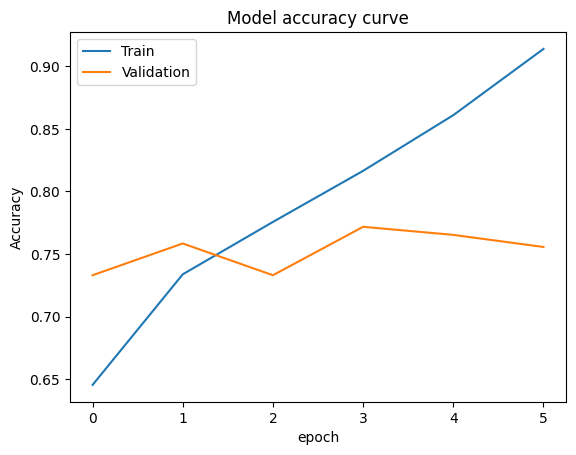

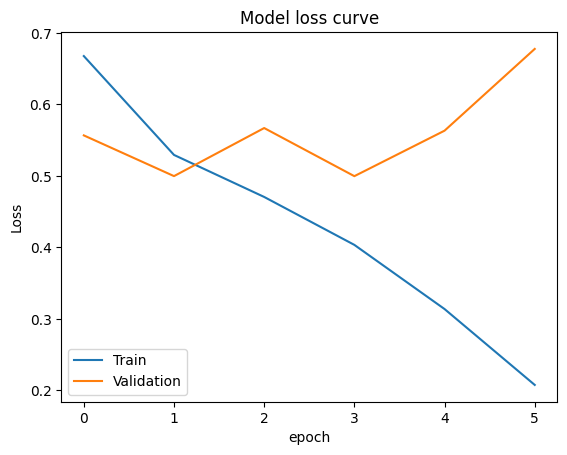

In [5]:
#plot the loss and accuracy
##your code goes here##
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.title('Model accuracy curve')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('AccuracyCurve.png')
plt.show()

plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.title('Model loss curve')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('LossCurve.png')
plt.show()